# Laboratory exercise no. 4: Application of box models to Upper Danube catchment simulation.

Katarzyna Wilk gr 2

The aim of the laboratory is to calculate a mean residence time of water in the river catchment.

We start with importing needed libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
import math
from scipy.optimize import minimize

The code cells below read data from files and diaplays them on plot.

In [2]:
opady = []
#input
with open('L04/opady.prn', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        t = []
        for x in row:
            if x != '':
                t.append(float(x))
        opady.append(t)
        #print(''.join(row))
        
dunaj = []

with open('L04/dunaj.prn', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        t = []
        for x in row:
            if x != '':
                t.append(float(x))
        dunaj.append(t)

In [3]:
input_data = []
for i in range(len(opady)):
    input_data.append(opady[i][1])

    
output_data = []
for i in range(len(dunaj)):
    output_data.append(dunaj[i][1])

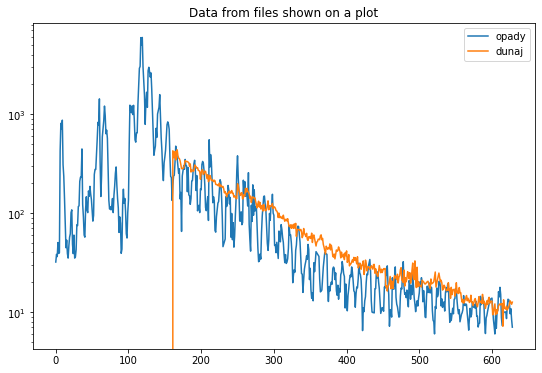

In [4]:
plt.figure(figsize = (9, 6))
plt.plot(input_data, label = "opady")
plt.plot(output_data, label = "dunaj")
plt.yscale('log')
plt.legend()
plt.title("Data from files shown on a plot")
plt.show()

# Different models with the same parameters

I started with defining three models:
1) exponential model
2) piston model
3) dispersion model

The starting data for all models is in the cell below.

In [5]:
tt = 5
lam =  4.696e-3
Pe = 1.4

In [6]:
def piston_flow(t1,t2,t):
    if (t1-t2)- t == 0:
        return 1 
    return 0

def exponential_model(t1,t2,t):
    return t**(-1)*np.exp(-(t1-t2)/t)

def dispersion_model(t1,t2,t):
    return (4 * math.pi * Pe*(t1-t2)/t)**(-1/2) * 1/(t1-t2) * np.exp(-((1-(t1-t2)/t)**2)/(4*Pe*(t1-t2)/t))

Function blac_box is calculating output function based on the chosen model. The default model is exponential model

In [7]:
def black_box(input,t, t_t, model = 'exp'):
    res = 0
    if model == 'exp':
        for i in range(1,t+1):
            res += input[i-1] * exponential_model(t,i, t_t)*np.exp(-lam*(t-i))
    elif model == 'piston':
         for i in range(1,t+1):
            res += input[i-1] * piston_flow(t,i, t_t)*np.exp(-lam*(t-i))
    elif model == 'disp':
        for i in range(1,t+1):
            if i - t != 0:
                res += input[i-1] * dispersion_model(t,i, t_t)*np.exp(-lam*(t-i))
    return res

The run_model function is just a helper function to shorten the code. It calls the black_box function.

In [8]:
def run_model(input_data,tt, model = 'exp',show = True):
    result = np.zeros(161)
    for i in range(161, len(input_data)):
        result = np.append(result, black_box(input_data, i,tt, model))

    rmse = np.sqrt(np.sum((output_data[:] - result[:len(output_data[:])])**2) / result.size)
    if show:
        print(f'RMSE for tt = {tt}: {rmse}, model: {model}')
    return result,rmse
    

This is how the run_model function should be called. We call it once for every model

In [9]:
result_exp,_ = run_model(input_data,tt,'exp')
result_piston,_ = run_model(input_data,tt,'piston')
result_disp,_ = run_model(input_data,tt,'disp')

RMSE for tt = 5: 19.10631849111322, model: exp
RMSE for tt = 5: 50.62801879949078, model: piston
RMSE for tt = 5: 30.12392226884266, model: disp


Now we can display the results on a plot

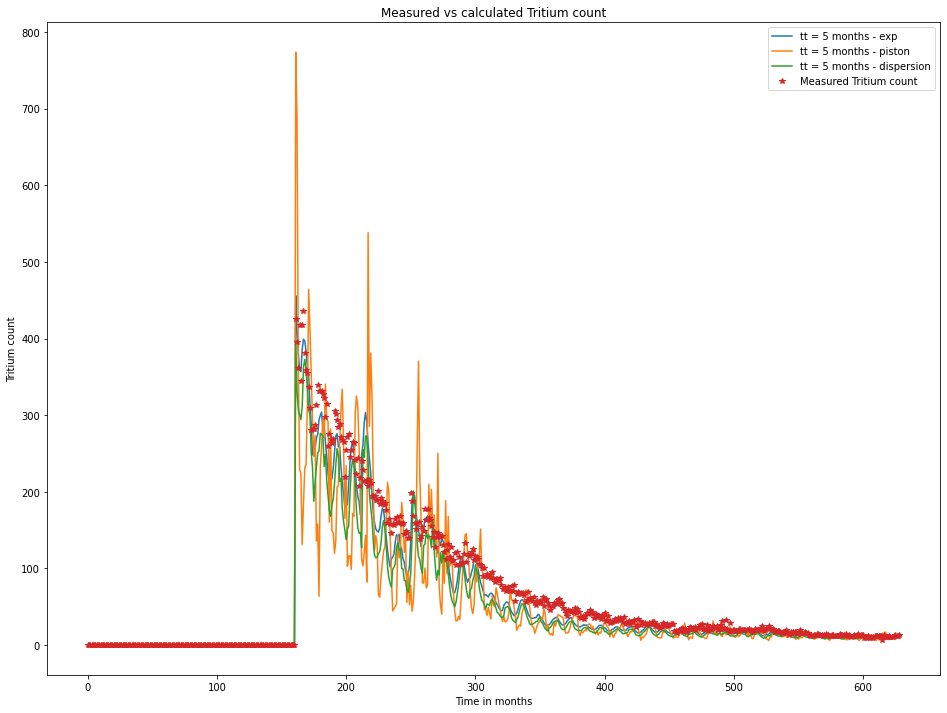

In [10]:
plt.figure(figsize = (16, 12))
plt.plot(result_exp, label=f'tt = {tt} months - exp')
plt.plot(result_piston, label=f'tt = {tt} months - piston')
plt.plot(result_disp, label=f'tt = {tt} months - dispersion')

plt.plot(output_data, '*', label='Measured Tritium count')
plt.xlabel('Time in months')
plt.ylabel('Tritium count')
plt.title('Measured vs calculated Tritium count')
plt.legend()
plt.show()

# The same model with different parameter tt

The goal of this section is checking how different tt values affect the results in our models

plot_fig is a hepler function, it displays results on a plot.

In [11]:
def plot_fig(data,tt_tab,model):
    plt.figure(figsize = (16, 12))
    for d,t in zip(data,tt_tab):
        plt.plot(d, label=f'tt = {t} months - {model}')
    plt.plot(output_data, '*', label='Measured Tritium count')
    plt.xlabel('Time in months')
    plt.ylabel('Tritium count')
    plt.title('Measured vs calculated Tritium count')
    plt.legend()
    plt.show()

I will test tt values from tt_tab

In [12]:
tt_tab = [3,5,7,9,11]

## Exponential model

In [13]:
t_res_exp = []
rmse_tab = []
for t in tt_tab:
    r,m = run_model(input_data,t,'exp')
    t_res_exp.append(r)
    rmse_tab.append(m)

RMSE for tt = 3: 22.56709322974639, model: exp
RMSE for tt = 5: 19.10631849111322, model: exp
RMSE for tt = 7: 18.665630115940157, model: exp
RMSE for tt = 9: 20.37511463025706, model: exp
RMSE for tt = 11: 24.183947514801638, model: exp


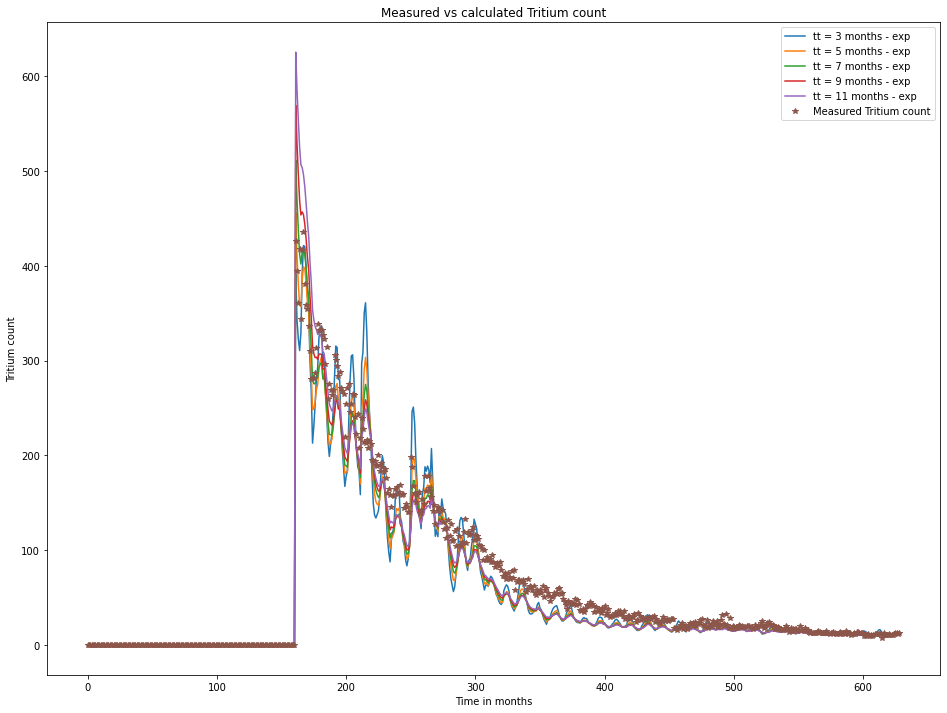

In [14]:
plot_fig(t_res_exp,tt_tab,'exp')

## Piston Model

In [15]:
t_res = []
rmse_tab = []
for t in tt_tab:
    r,m = run_model(input_data,t,'piston')
    t_res.append(r)
    rmse_tab.append(m)

RMSE for tt = 3: 45.84685482022223, model: piston
RMSE for tt = 5: 50.62801879949078, model: piston
RMSE for tt = 7: 55.45142655092712, model: piston
RMSE for tt = 9: 54.122807165462554, model: piston
RMSE for tt = 11: 50.67876002085949, model: piston


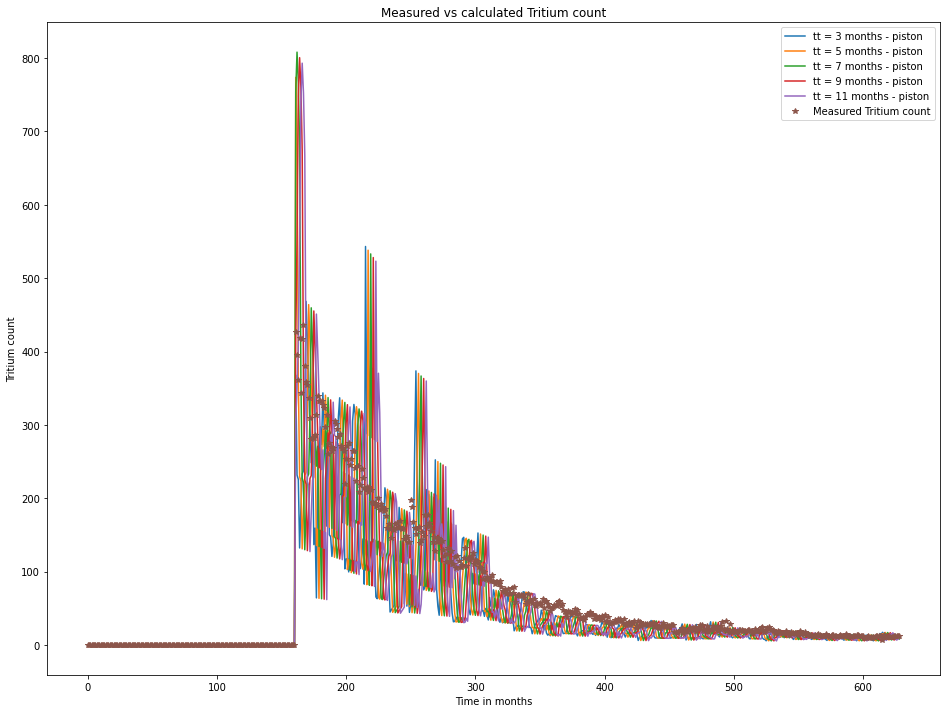

In [16]:
plot_fig(t_res,tt_tab,'piston')

## Dispersion model

In [17]:
t_res = []
rmse_tab = []
for t in tt_tab:
    r,m = run_model(input_data,t,'disp')
    t_res.append(r)
    rmse_tab.append(m)

RMSE for tt = 3: 43.89346274393949, model: disp
RMSE for tt = 5: 30.12392226884266, model: disp
RMSE for tt = 7: 23.470379623213567, model: disp
RMSE for tt = 9: 20.7777591708557, model: disp
RMSE for tt = 11: 20.39489778358636, model: disp


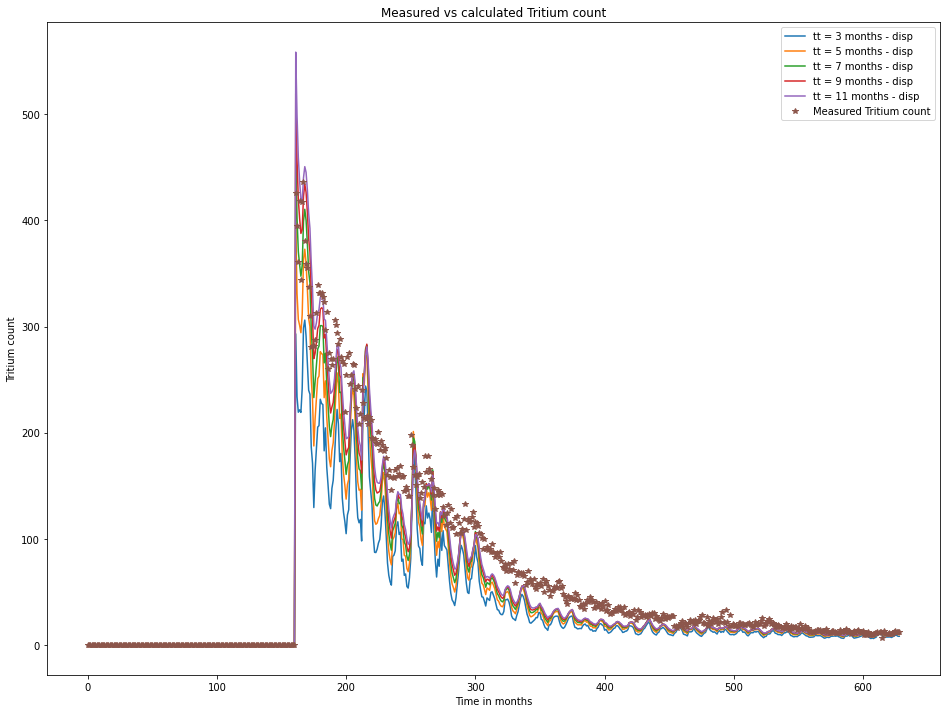

In [18]:
plot_fig(t_res,tt_tab,'disp')

## Best parameters

Different tt values give different result. I picked the best tt values for every model and displayed the results for them on one plot.

In [42]:
exp_tt = 7
piston_tt = 3
dispersion_tt = 11

In [43]:
result_exp,_ = run_model(input_data,exp_tt,'exp')
result_piston,_ = run_model(input_data,piston_tt,'piston')
result_disp,_ = run_model(input_data,dispersion_tt,'disp')

RMSE for tt = 7: 18.665630115940157, model: exp
RMSE for tt = 3: 45.84685482022223, model: piston
RMSE for tt = 11: 20.39489778358636, model: disp


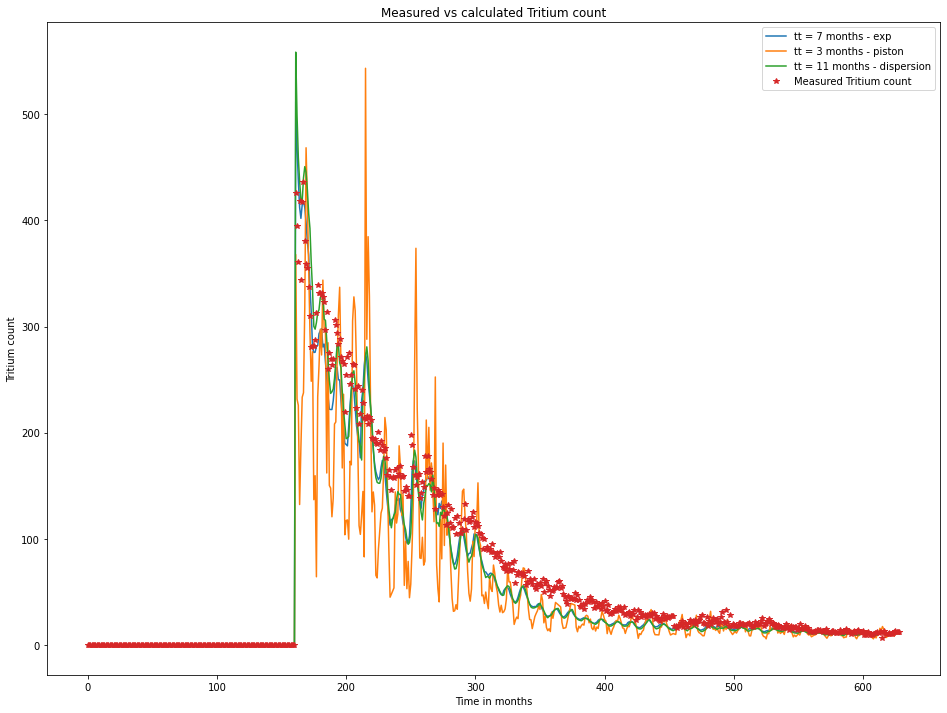

In [44]:
plt.figure(figsize = (16, 12))
plt.plot(result_exp, label=f'tt = {exp_tt} months - exp')
plt.plot(result_piston, label=f'tt = {piston_tt} months - piston')
plt.plot(result_disp, label=f'tt = {dispersion_tt} months - dispersion')

plt.plot(output_data, '*', label='Measured Tritium count')
plt.xlabel('Time in months')
plt.ylabel('Tritium count')
plt.title('Measured vs calculated Tritium count')
plt.legend()
plt.show()

Right now the exponential model seems to be the best model, with dispersion model being the close second and piston model giving the worst results.

# Optimizing tt

The value tt can be optimized. As shown in the section above different tt values return different rmse. My goal for this section is to find optimal tt first using trial-error method and later doing it automatically.

## Trial-error

### Exponential model

For trial-error method I picked 1500 tt values from 1 to 500

In [22]:
tt_tab = np.linspace(1,500,1500)

In [23]:
rmse_tab = []
for t in tt_tab:
    _, rmse = run_model(input_data,t,'exp', False)
    rmse_tab.append(rmse)

Text(0.5, 1.0, 'RMSE values for different tt')

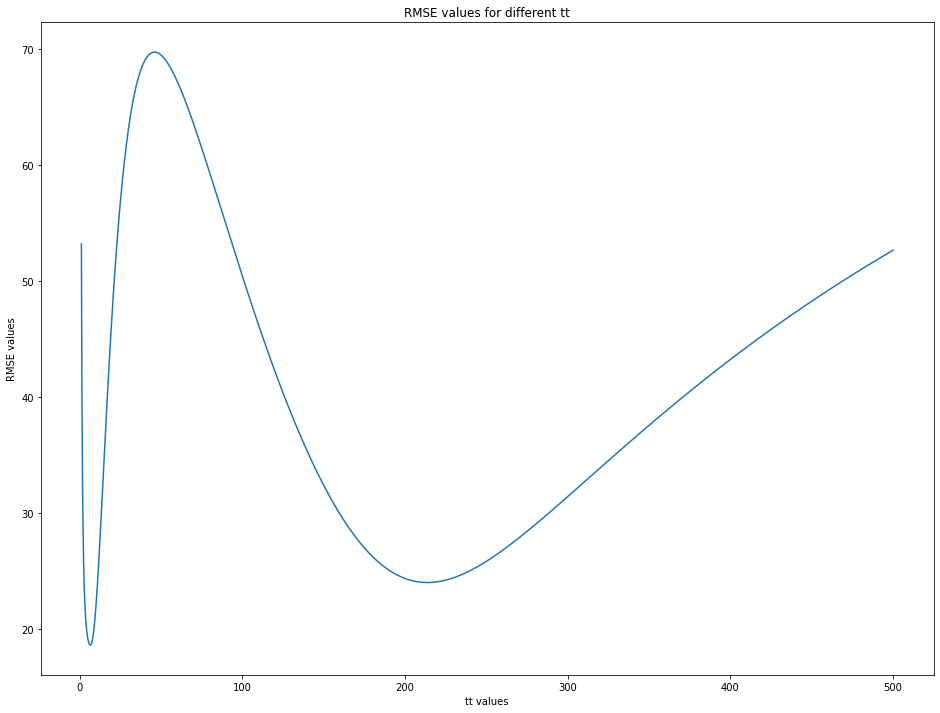

In [24]:
plt.figure(figsize = (16, 12))
plt.plot(tt_tab,rmse_tab)
plt.xlabel("tt values")
plt.ylabel("RMSE values")
plt.title("RMSE values for different tt")

The function seems to have two minimas - one close to 0 and one close to 200.

In [25]:
m1 = min(rmse_tab)
tt1 = tt_tab[rmse_tab.index(m1)]
tt1

6.326217478318879

rmse for tt = 6.326217478318879 is 18.590798244667678

In [26]:
m2 = min(rmse_tab[150:])
tt2 = tt_tab[rmse_tab.index(m2)]
tt2

213.71581054036025

rmse for tt = 213.71581054036025 is 23.997526928057543

### Piston model

Piston model works only on ineger tt values

In [27]:
tt_tab = np.linspace(1,500,500)

In [28]:
rmse_tab = []
for t in tt_tab:
    _, rmse = run_model(input_data,t,'piston', False)
    rmse_tab.append(rmse)

Text(0.5, 1.0, 'RMSE values for different tt')

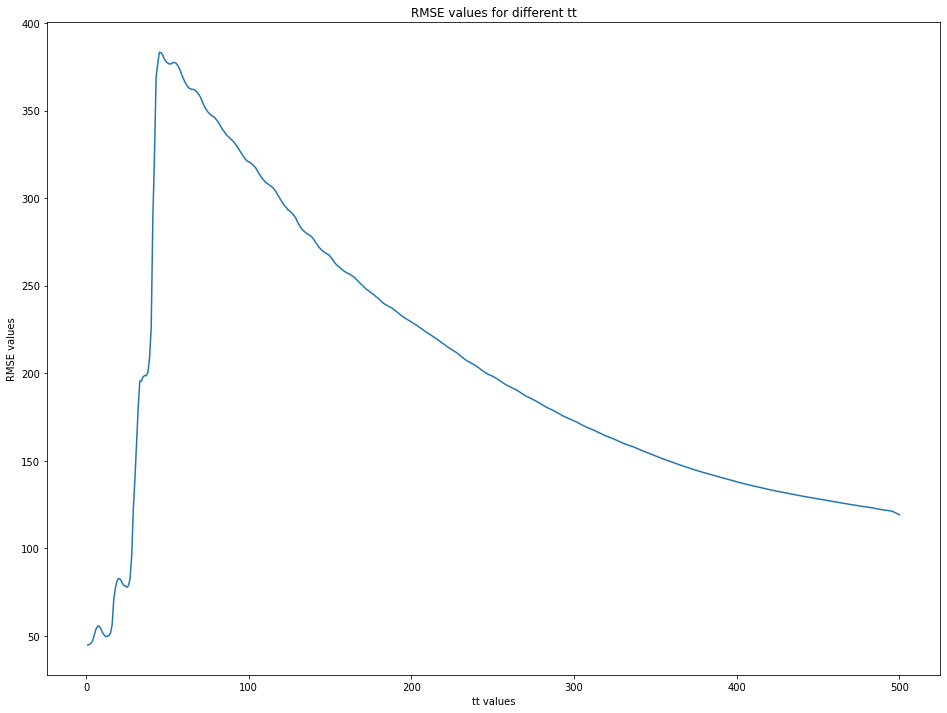

In [29]:
plt.figure(figsize = (16, 12))
plt.plot(tt_tab,rmse_tab)
plt.xlabel("tt values")
plt.ylabel("RMSE values")
plt.title("RMSE values for different tt")

In [30]:
m1 = min(rmse_tab)
tt1 = tt_tab[rmse_tab.index(m1)]
tt1

1.0

rmse for tt = 1 is 44.74086033104824

It looks like there might be another minimum to the right, but it takes too long to keep calculating.

### Dispersion model

In [32]:
tt_tab = np.linspace(1,500,1500)

In [33]:
rmse_tab = []
for t in tt_tab:
    _, rmse = run_model(input_data,t,'disp', False)
    rmse_tab.append(rmse)

Text(0.5, 1.0, 'RMSE values for different tt')

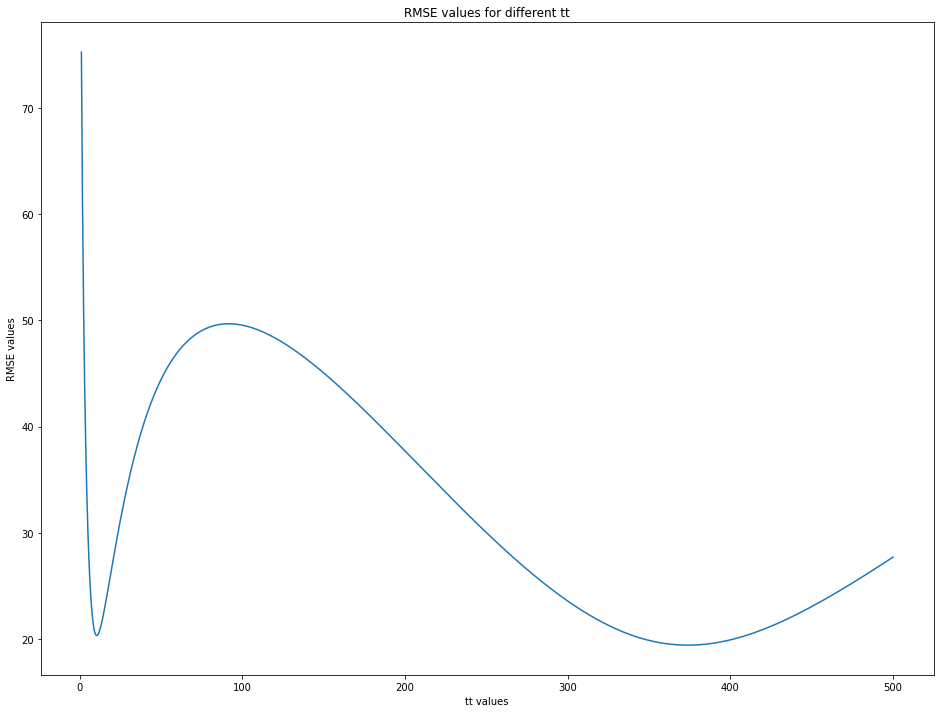

In [34]:
plt.figure(figsize = (16, 12))
plt.plot(tt_tab,rmse_tab)
plt.xlabel("tt values")
plt.ylabel("RMSE values")
plt.title("RMSE values for different tt")

In [35]:
m1 = min(rmse_tab)
tt1 = tt_tab[rmse_tab.index(m1)]
tt1

373.83522348232157

rmse for tt = 373.83522348232157 is 19.440894361656017

In [37]:
m2 = min(rmse_tab[:150])
tt2 = tt_tab[rmse_tab.index(m2)]
tt2

10.320880587058038

rmse for tt = 10.320880587058038 is 20.34236432771356

This model also has 2 minima - one around 373 and another around 10

The trial-error method takes a really long time to calculate, but it is possible to find optimal values of tt.

## Automatic

To find the optimal tt value automatically, I used the minimize function from scipy module. We need function to minimize (to_minimize), and a starting point (I picked 1).

In [38]:
def to_minimize(t, input_data, output_data, model = 'exp'):
    result = np.zeros(161)
    
    for i in range(161, len(input_data)):
        result = np.append(result, black_box(input_data, i,t, model))

    rmse = np.sqrt(np.sum((output_data[:] - result[:len(output_data[:])])**2) / len(result))
    return rmse

### Exponential model

In [39]:
initial_guess = 1 
result = minimize(to_minimize, initial_guess, args=(input_data, output_data, 'exp'), method='Nelder-Mead')

optimized_tt = result.x[0]

print("Optimized tt:", optimized_tt)
print("Minimum RMSE:", result.fun)

Optimized tt: 6.448437500000011
Minimum RMSE: 18.58704570147656


### Piston model

In [40]:
initial_guess = 1 
result = minimize(to_minimize, initial_guess, args=(input_data, output_data, 'piston'), method='Nelder-Mead')

optimized_tt = result.x[0]

print("Optimized tt:", optimized_tt)
print("Minimum RMSE:", result.fun)

Optimized tt: 1.0
Minimum RMSE: 44.74086033104824


### Dipersion model

In [41]:
initial_guess = 1 
result = minimize(to_minimize, initial_guess, args=(input_data, output_data, 'disp'), method='Nelder-Mead')

optimized_tt = result.x[0]

print("Optimized tt:", optimized_tt)
print("Minimum RMSE:", result.fun)

Optimized tt: 10.43320312500002
Minimum RMSE: 20.340040461147144


For exponential model and piston model found values are very close. Minimize found local minimum (value very close to trial-error method), but it couldn't find global minimum. The reason is because I picked the starting point as 1, the closest minimum was local. Overall minimize found desired values very quickly compared to the trial-error, but we have to be careful with the starting point

# Concusion

This exercise let us calculate the mean residence time of water in the river catchment. I implemented three different models (exponential, piston and dispersion models) and calculated the most optimal tt value. Optimalization can be done by trial-error or automatic method. Both methods can be used to calculate tt. Trial-error takes much longer to calculate, but using minimize can return local minimum instead of global, so we have to pick an accurate starting point. 

To sum up the results were very close to actual values, the difference between values found by trial-error and automatic method (if we look at local minimum) was negligible. The exponential model performed the best, but dispersion model was very close. The best found tt for exponential model was 6.448437500000011 and for dispersion model 373.83522348232157.